<a href="https://colab.research.google.com/github/braunito/DisketeParameterZyklisch/blob/main/DiskreteParameterDatenreihen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diskrete Werte aus zyklischen Datenreihe bestimmen 

---

## Notwendige Funktionen und Pakete laden

In dem ersten Code-Abschnitt werden alle Funktionen geladen, die neben den Standardfunktionen gebraucht werden.

### Aufgabe
Die grauen Code-Schnipsel können gestartet werden, um den Code auszuführen. Links oben im Kasten ist ein Play-Button, durch Anklicken wird der Code ausgeführt und zur nächsten Zelle gesprungen. Evtl. werden auch Werte oder Grafiken unter der Code-Zelle ausgegeben.
Lassen sie die erste Zelle ausführen und lesen sie dann darunter weiter. 

In [3]:
#================================================================
# Funktionen und Pakete laden
#================================================================

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
from scipy.signal.signaltools import filtfilt
from scipy.signal.filter_design import butter


---

## Daten einlesen und auswählen
Hier wird ein Datensatz eines Probanden eingelesen. Anschließend werden die für diese Analyse relevanten Flexion- & Extensionsdaten des linken Hüftgelenks ausgewählt und in der Variable hip gespeichert.

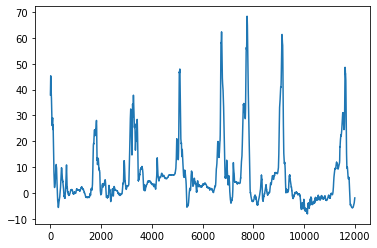

In [4]:
# Laden der Datendatei
data=pd.read_csv('/content/drive/MyDrive/share/2022-01_Xbox-Kinematics/S08.txt', sep='\t',skiprows=4) # Funktion zum Laden einer csv-Datei. Die Spalten sind durch Tabulatoren getrennt, die ersten vier Reihen werden ignoriert.

# Auswählen und leichte Aufbereitung
hip=(-1)*data.iloc[:,49]      # Auswählen der Spalte mit den Hüftflexions- und -extensionsdaten der linken Hüfte
hip=hip[~np.isnan(hip)]       # Evtl. leere Zellen werden gelöscht
t=range(0,len(hip))           # Ein Zeitstrahl (in Messzeitpunkten) von 0 bis zur Länge der Hüftdaten wird generiert 

# Zeichnen
plt.plot(t,hip)               # Die Hüftdaten werden als Grafik gezeichnet, um einen Überblick zu erhalten


---

## Daten digital gefiltert

Um das Nutzsignal von störenden Störsignalen zu reinigen, werden die Daten gefiltert (Thema einer anderen Stunde). Das geglättete Signal wird von hier an für den Hüftwinkel verwendet.

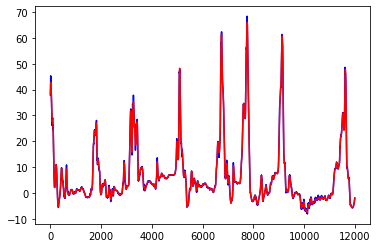

In [5]:
# Digital Filtern
b,a=butter(2,5/125,'low')   # Filtereigenschaften: Low-pass Butterworthfilter 4. Ordnung, cut-off 5Hz
hip_filt=filtfilt(b,a,hip)  # Filtern

# Zeichnen
plt.plot(t,hip,'b')         # Originalkurve in blau
plt.plot(t,hip_filt,'r')    # Gefilterte Kurve in rot

---

## Die Suche nach den Peaks
Hier wird eine Funktion (find_peaks) verwendet, die Spitzen in dem Signal erkennen kann und ihre Position ausgibt. 

[42.80611752 27.90665294 10.91483711  9.56234325  9.24425048  1.27604379
  0.21208523  1.44746653  1.12742027  2.23626285 -1.6534298  -1.59947805
  1.53420874 24.02506646 27.1384325  12.84927839  3.37083506  4.90698171
 -1.48281796  2.33195606  1.10390133  2.35436005 11.945772    2.82422298
 31.8407971  35.20061313 27.53397025 10.07938575  2.49042593  4.50788748
  4.59997736  3.54520342  3.26228889 12.20802752  7.60325571  6.79242572
  5.71928907  7.02984207  7.02594175 20.04698763 48.25106721 15.764352
  8.34169805 -4.80225199  1.50248713  8.35678754  5.41986077  4.55617034
  2.72979573  2.52144834  3.35241065  3.757971    2.05482867  1.8123105
  1.43628291 19.87376665 61.38331574 11.43700812  6.15963764 10.49214797
  4.26861145  3.99008966 34.67529016 66.04139881 -0.92421738  6.66964964
  2.90920071  3.602183    6.57422775  7.80337798  7.84593136 60.64147928
  1.28965148  6.76590618  0.0885178   0.22001988 -0.35572239 -4.45941253
 -3.3477984  -6.58090396 -6.65025269 -4.34524149 -2.02

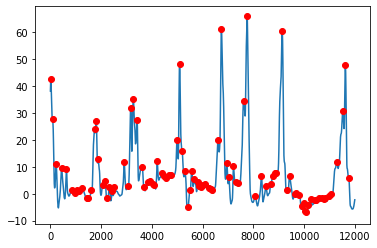

In [6]:
# Peaks suchen
tpeaks, _=find_peaks(hip_filt)    # Hier werden die Zeitpunkte der Peaks gesucht.
peaks=hip_filt[tpeaks]            # Und hier die entsprechenden Werte herausgesucht.

# Ausgeben und Zeichnen
print(peaks)                      # Werte der Peaks anzeigen
plt.plot(t,hip_filt)              # Kurve zeichnen
plt.plot(tpeaks,peaks,'ro')       # Peaks einzeichnen




---



## Parameter anpassen
Ups, das sind zu viele Peaks, die Funktion hat jede kleine Zacke in der Kurve als Peak interpretiert. Wir sind aber nur an den wirklichen Spitzenwerten interessiert. 
Daher müssen wir der Funktion weitere Parameter geben, um nur die relevanten Peaks zu erkennen. Dazu sind im nächsten Beispiel zwei Parameter eingefügt:


*   height - die Höhe, die ein Peak mindestens haben muss, um als Peak erkannt zu werden
*   distance - der Umkreis in Messzeitpunkten, indem kein weiterer Peaks sein darf 

### Aufgabe
Passen sie die Werte der Parameter so an, dass nur die relevanten Peaks erkannt werden. Die Vorgabe **None** kann durch Zahlen ersetzt werden. 


In [ ]:
# Peaks suchen
tpeaks, _=find_peaks(hip_filt,height=None,distance=None)      # Hier können die beiden Parameter verändert werden 
peaks=hip_filt[tpeaks]

# Ausgeben und Zeichnen
print(peaks)
plt.plot(t,hip_filt)
plt.plot(tpeaks,peaks,'ro')


## Lösung
 Wie waren die Spitzenwerte der Knieflexion für Probanden S09?
 **Maximale Knieflexionswinkel:**
 * Proband S09: 




---



## Überprüfen der Verallgemeinbarkeit
Wenn durch die gewählten Werte alle relevanten Peaks, und nur diese, erkannt wurden, ist für diesen Probanden die Aufgabe erledigt. Aber funktionieren die Werte auch bei anderen Probanden? 

Aufgabe
Gehen sie zurück zu der Code-Zelle, in der die Daten eingelesen werden und laden sie einen anderen Probanden (S08, S09, S10 oder S11). Lassen sie die folgenden Code-Zellen durchlaufen und überprüfe sie, ob ihre Parameter bei allen Probanden sinnvoll gesetzt sind.